In [170]:
import io
import panel as pn
from pynwb import NWBHDF5IO
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

pn.extension()
plt.rcParams["figure.figsize"] = (15,5)

In [126]:
plt.rcParams["figure.figsize"] = (20,10)

In [114]:
plt.rc('text', usetex=False)

In [2]:
fI = pn.widgets.FileInput(accept='.mat, .nwb', multiple=True)
fI
# edited ff config parameters but notebook crushes on load of dataset: increased data_limit... 
# max_data_rate NotebookApp.... 


FileInput(accept='.mat, .nwb', multiple=True)

In [6]:
file_input = pn.widgets.FileSelector(directory='~/ppp/data', file_pattern='*.nwb', only_files=True,
                                     refresh=1, root_directory='~/ppp/data')
file_input

FileSelector(directory='/Users/duuta/ppp/data', file_pattern='*.nwb', only_files=True, root_directory='/Users/duuta/ppp/data')

In [10]:
file_input.value

['/Users/duuta/ppp/data/ibl/000017/sub-Cori/sub-Cori_ses-20161214T120000.nwb']

In [24]:
def read_file(_file, rparam):
    f = NWBHDF5IO(_file, mode='r')
    x = f.read()
    y = x.acquisition[rparam].data[()]
    return y

In [25]:
data = read_file(_file=file_input.value[0], rparam='lickPiezo')

In [45]:
def dataplot(x):
    plt.plot(x)
    plt.xlable('Time')
    plt.ylable('Rates')

def plotting():
    fig, ax = plt.subplots(nrows= 2, ncols=1, figsize=(8, 5))

    ax[0].plot(yy[which_w])
    ax[0].set_title(F'Moving average {which_w}')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Rate')
    ax[1].plot(cy[which_w])
    ax[1].set_title(F'Autocorrelation {which_w}')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Rate')

    plt.tight_layout()

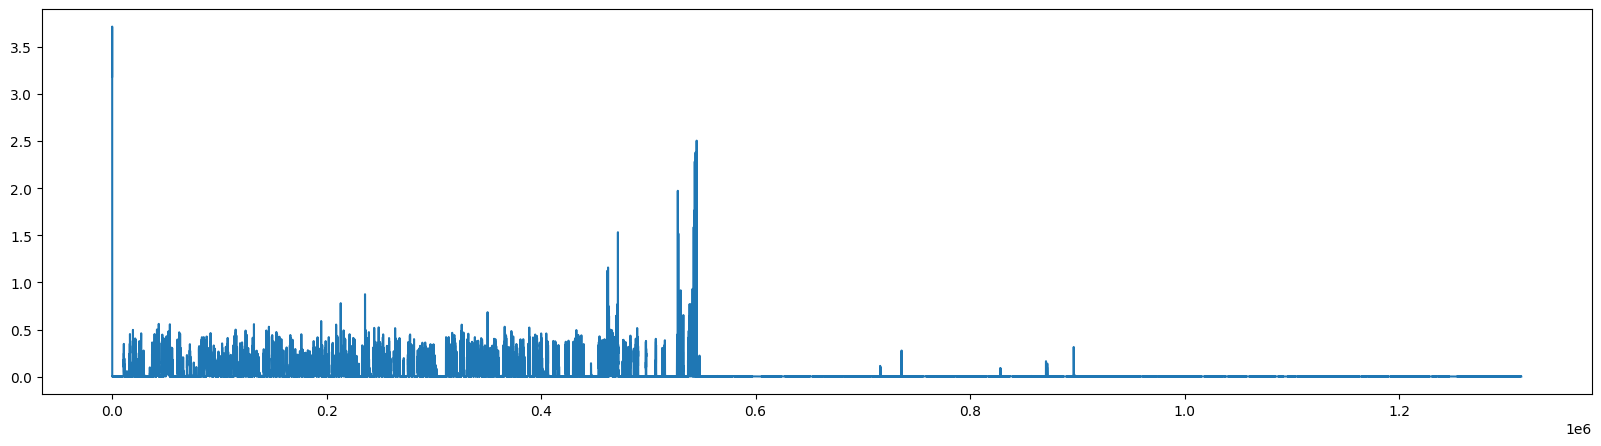

In [44]:
dataplot(data)

In [95]:
import numpy as np
import random

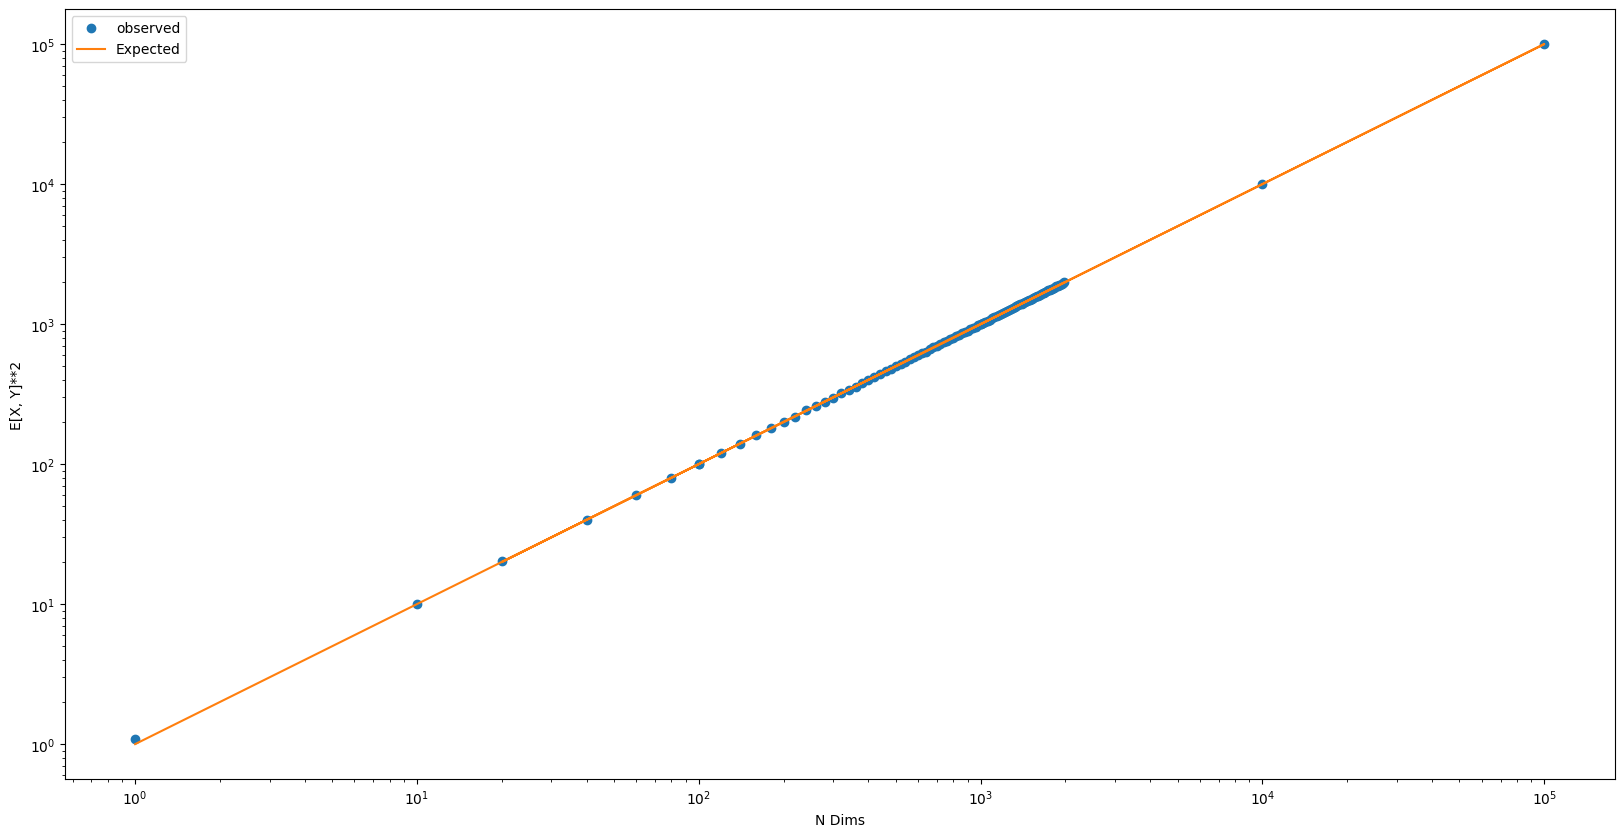

In [127]:
#  3.2.4 (ii)
# across diff dimensions 
# E(X, Y)^2 = n
random.seed(10)
lhs = []
ndim = [10**j for j in np.arange(0, 6)]
addims = [ r for r in np.arange(20, 2000) if r%20 ==0]
ndim.extend(addims)
smple_size = 1000 
for n in  ndim:
        X = np.random.randn(n, sample_size)
        Y = np.random.randn(n, sample_size)
        xy = np.sum((X*Y)**2, axis=0)
        yy= np.mean(xy)
        lhs.append(yy)
        
plt.loglog(ndim, lhs, 'o', label='observed')
plt.loglog(ndim, ndim, label='Expected')
plt.xlabel("N Dims"); plt.ylabel("E[X, Y]**2");plt.legend();

In [73]:
?sum

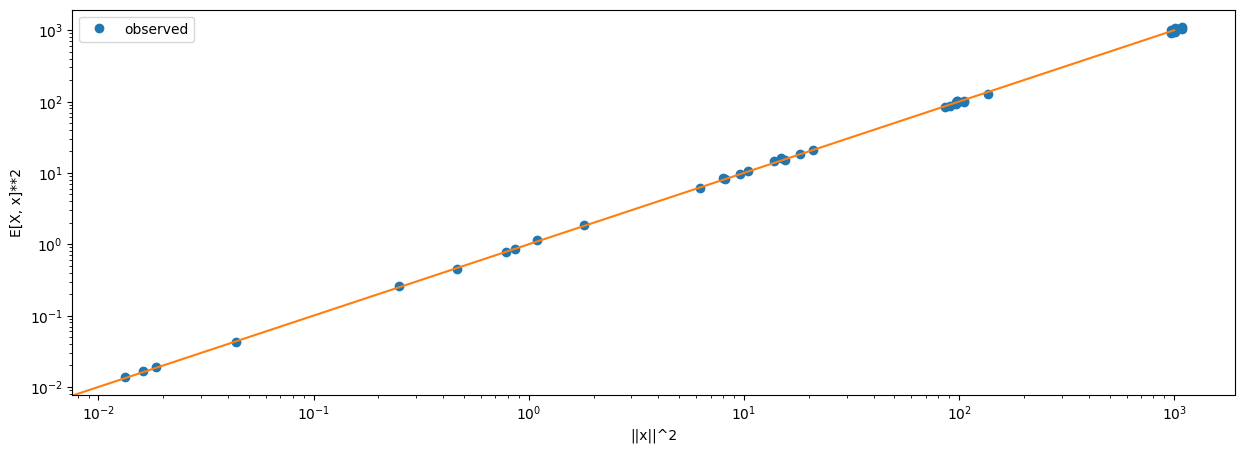

In [174]:
# Lemma 3.2.3
LHS = []
RHS = []
sample_size = 1000
for n in ndim[:4]:
    for j in range(10):
        XX = np.random.randn(n, sample_size)
        x = np.random.randn(n, )
        XXx = (XX.T @ x)**2
        EXXx = np.mean(XXx)
        x2 = np.sum(x**2)
        LHS.append(EXXx)
        RHS.append(x2)
    
plt.loglog(RHS , LHS, 'o', label='observed')
plt.loglog(np.arange(0, 10**3), np.arange(0, 10**3));
plt.xlabel("||x||^2"); plt.ylabel("E[X, x]**2")
plt.legend();

In [152]:
np.random.randn(n, )


array([-0.29996478,  0.90963349,  0.54705395,  1.75257409, -0.30577157,
        0.10757211,  0.57474077,  0.43009114, -0.93207872,  0.29010944])

In [138]:
EXXx

1980.3896722511072

In [155]:
x2

1948.235101903486

In [144]:
x2

1977510.9304041523